#### Install Pandas

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


#### Memuat file `config.yaml`

In [2]:
import yaml

with open('./config.yaml', 'r') as file:
    config = yaml.safe_load(file)

#### Mengimpor pandas

In [3]:
import pandas as pd

#### Memuat dan menampilkan dataset

In [4]:
dataframe = pd.read_csv(config['dataset'], low_memory=False)
dataframe.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


#### Menampikan dimensi dataset


In [5]:
dataframe.shape

(8405079, 11)

#### Menampilkan daftar nama kolom

In [6]:
dataframe.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

#### Ringkasan data

In [7]:
dataframe.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8405079,2870789,4395957,8405079,8405061,8404990,8405072,8405079,8405079,8405079,8405079
unique,321,313,338,2,5,10,9,4,4,4,4
top,2020/06/24,2020/11/09,2020/11/02,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155857,50595,49527,7910118,4340898,1635264,2781176,3502556,6178281,3690813,6063390


#### Menampilkan info dataset

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


#### Membersihkan dataset yang null dan menyimpan pada `df_clean_rows`

In [9]:
dataframe.drop(dataframe[dataframe['hosp_yn'] == 'Missing'].index, inplace=True)
dataframe.drop(dataframe[dataframe['icu_yn'] == 'Missing'].index, inplace=True)
dataframe.drop(dataframe[dataframe['death_yn'] == 'Missing'].index, inplace=True)
dataframe.drop(dataframe[dataframe['medcond_yn'] == 'Missing'].index, inplace=True)
dataframe.drop(dataframe[dataframe['Race and ethnicity (combined)'] == 'Missing'].index, inplace=True)
dataframe.drop(dataframe[dataframe['age_group'] == 'Unknown'].index, inplace=True)
dataframe.drop(dataframe[dataframe['Race and ethnicity (combined)'] == 'Unknown'].index, inplace=True)
df_clean_rows = dataframe.dropna()

#### Menampilkan dataset yang bersih

In [10]:
df_clean_rows

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
11,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
14,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7494686,2020/11/15,2020/11/29,2020/11/15,Laboratory-confirmed case,Female,20 - 29 Years,"Black, Non-Hispanic",No,No,No,No
7494687,2020/11/15,2020/11/29,2020/11/15,Laboratory-confirmed case,Female,20 - 29 Years,"Black, Non-Hispanic",Yes,No,No,No
7494700,2020/11/18,2020/11/30,2020/11/18,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,No,No,No
7494714,2020/11/08,2020/11/30,2020/11/08,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,No,No,Yes


#### Install matplotlib

In [11]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


#### Mengimpor matplotlib

In [12]:
import matplotlib.pyplot as plt

#### Install seaborn

In [13]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


#### Mengimpor seaborn

In [14]:
import seaborn as sns

#### Menampilkan data kolom `age_group`

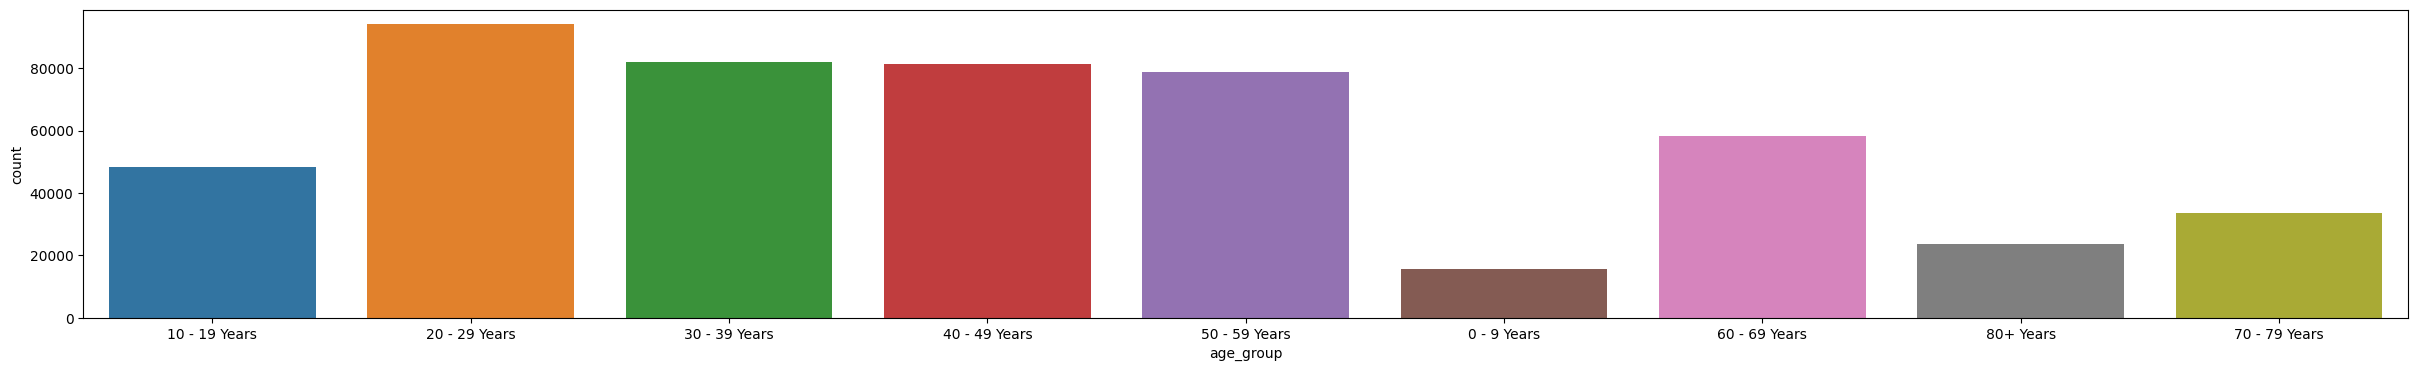

In [15]:
plt.figure(figsize = (30,4))
sns.countplot(x='age_group', data=df_clean_rows)
plt.show()

#### Menampilkan data kolom `Race and ethnicity (combined)`

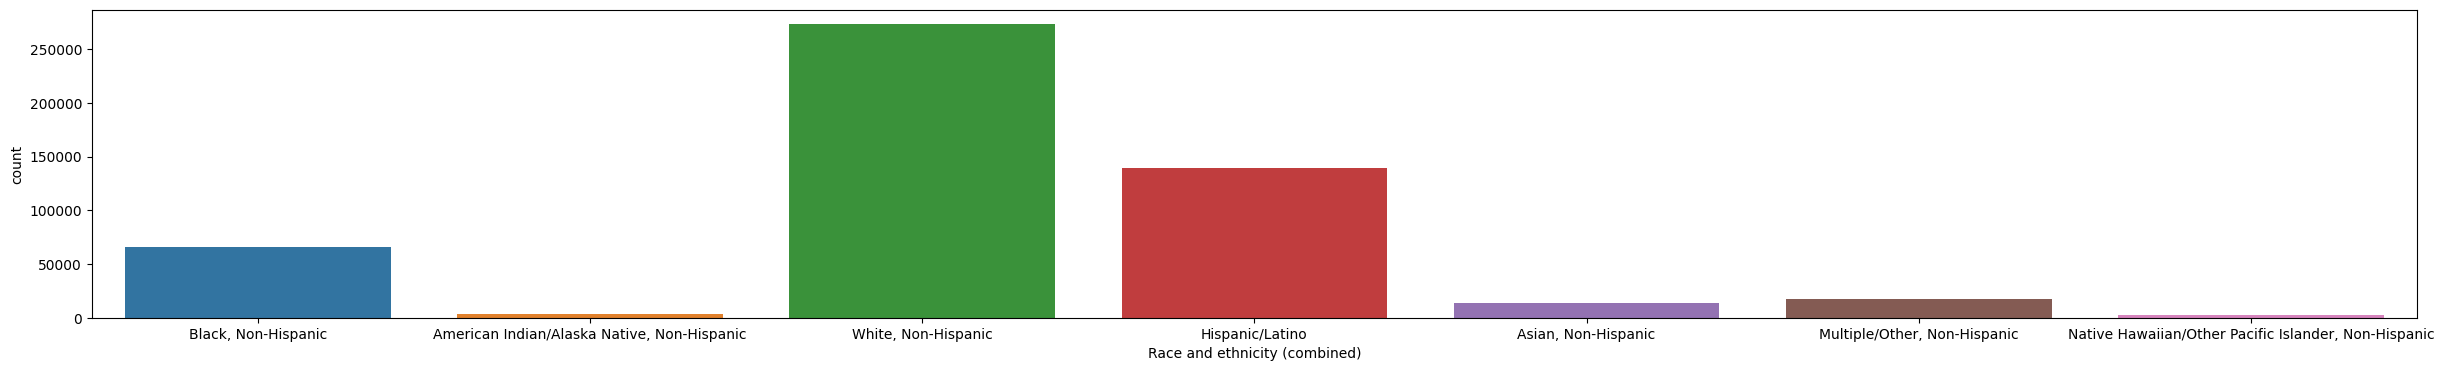

In [16]:
plt.figure(figsize = (30,4))
sns.countplot(x='Race and ethnicity (combined)', data=df_clean_rows)
plt.show()

#### Install sklearn

In [17]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


#### Mengimpor sklearn

In [18]:
from sklearn.preprocessing import LabelEncoder

#### Meng-encode label string ke integer

In [19]:
columns_to_encode = [
    'cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
    'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
    'medcond_yn', 'death_yn'
]

le = LabelEncoder()

for column in columns_to_encode:
    df_clean_rows.loc[:, column] = le.fit_transform(df_clean_rows[column])

#### Menampilkan dataset yang sudah di-encode

In [20]:
df_clean_rows

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
1,299,269,313,0,1,1,2,0,0,0,0
2,304,269,312,0,1,1,2,0,0,0,0
4,298,269,313,0,1,1,2,0,0,0,2
11,294,269,312,0,1,1,2,0,0,0,0
14,291,269,309,0,1,1,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
7494686,300,288,318,0,0,2,2,0,0,0,0
7494687,300,288,318,0,0,2,2,2,0,0,0
7494700,303,289,321,0,1,2,3,0,0,0,0
7494714,293,289,311,0,1,2,6,0,0,0,2


## Machine learning model

#### Memilih target

In [21]:
y = df_clean_rows['cdc_report_dt']
y

1          299
2          304
4          298
11         294
14         291
          ... 
7494686    300
7494687    300
7494700    303
7494714    293
7494730    299
Name: cdc_report_dt, Length: 515236, dtype: object

#### Memilih fitur

In [22]:
features = ['pos_spec_dt', 'onset_dt', 'sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'medcond_yn', 'death_yn']
X = df_clean_rows[features]
X

,pos_spec_dt,onset_dt,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,medcond_yn,death_yn
1,269,313,1,1,2,0,0,0,0
2,269,312,1,1,2,0,0,0,0
4,269,313,1,1,2,0,0,2,0
11,269,312,1,1,2,0,0,0,0
14,269,309,1,1,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...
7494686,288,318,0,2,2,0,0,0,0
7494687,288,318,0,2,2,2,0,0,0
7494700,289,321,1,2,3,0,0,0,0
7494714,289,311,1,2,6,0,0,2,0


#### Menampilkan fitur

In [23]:
X.describe()

,pos_spec_dt,onset_dt,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,medcond_yn,death_yn
count,515236,515236,515236,515236,515236,515236,515236,515236,515236
unique,292,335,5,9,7,3,3,3,3
top,268,305,0,2,6,0,0,2,0
freq,6513,4730,276516,94114,273182,426031,309319,224053,460600


#### Mengimpor `DecisionTreeRegresor`

In [24]:
from sklearn.tree import DecisionTreeRegressor

#### Konfigurasi model

In [25]:
covid_model = DecisionTreeRegressor(random_state=1)

#### Training model

In [26]:
covid_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

#### Melakukan prediksi

In [27]:
covid_model.predict(X.head())

array([301.  , 300.  , 295.75, 300.  , 291.  ])

In [28]:
y.head()

1     299
2     304
4     298
11    294
14    291
Name: cdc_report_dt, dtype: object

## Evaluasi Model

#### Mengimpor evaluation metric

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
y_hat = covid_model.predict(X)
mean_absolute_error(y, y_hat)

1.8524810286759388

#### Training dan testing

In [31]:
from sklearn.model_selection import train_test_split

#### Membagi dataset menjadi dua bagian

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Konfigurasi dan training model

In [33]:
covid_model = DecisionTreeRegressor(random_state=1)
covid_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

#### Evaluasi model

In [34]:
y_hat = covid_model.predict(X_test)
mean_absolute_error(y_test, y_hat)

7.173430005618763

#### Optimasi model

In [35]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_hat)
    return mae

In [36]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    leaf_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f'Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {int(leaf_mae)}')

Max leaf nodes: 5 	 Mean Absolute Error: 15
Max leaf nodes: 50 	 Mean Absolute Error: 7
Max leaf nodes: 500 	 Mean Absolute Error: 6
Max leaf nodes: 5000 	 Mean Absolute Error: 6


#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, y_hat))}')

Mean Absolute Error: 6
